<a href="https://colab.research.google.com/github/Archin0/PCVK_Sem5/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langkah 1: Import Library
Blok kode awal ini mengimpor semua pustaka Python yang diperlukan untuk sesi praktikum. Pustaka-pustaka ini menyediakan fungsi untuk manipulasi array (Numpy), pemrosesan gambar (OpenCV, Skimage), dan visualisasi data (Matplotlib).

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

## Langkah 2: Membaca dan Menampilkan Gambar dari URL
Kode ini membaca gambar dari sebuah daftar URL, mengubah ukurannya menjadi setengah dari ukuran asli, dan menampilkan versi asli (dalam format BGR seperti yang dibaca oleh OpenCV) dan versi yang telah dikonversi ke RGB secara berdampingan.

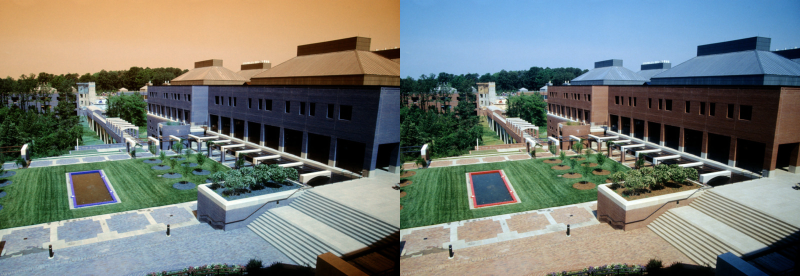

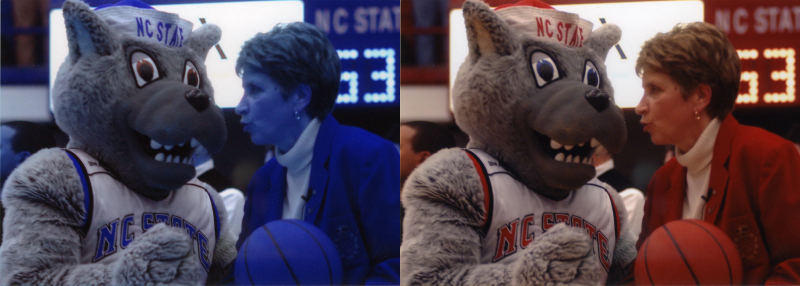

In [3]:
# Membuat sebuah list untuk menyimpan URL gambar
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        # "https://placekitten.com/800/571" #server down
        ]

# Melakukan loop untuk setiap URL gambar
for url in urls:
  # Membaca gambar dari URL
  image = io.imread(url)

  # Mengubah ukuran gambar menjadi setengahnya
  image_resized = cv.resize(image, (0,0), fx=0.5, fy=0.5)

  # Mengonversi warna dari BGR (default OpenCV) ke RGB
  image_rgb = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)

  # Menggabungkan gambar asli dan gambar RGB secara horizontal
  final_frame = cv.hconcat((image_resized, image_rgb))

  # Menampilkan gambar gabungan
  cv2_imshow(final_frame)
  print('\n')

## Langkah 3: Memeriksa Dimensi Gambar
Potongan kode ini membaca satu gambar dan mencetak resolusinya, yaitu tinggi dan lebar dalam satuan piksel.

resolusi image: tinggi x lebar = 571 x 800


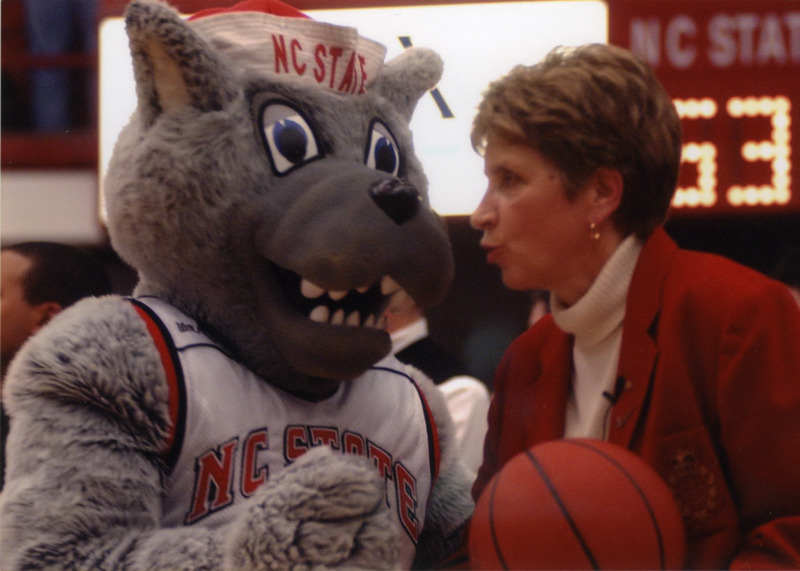

In [4]:
# Menggunakan URL untuk gambar kucing
url_cat = "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg"

# Membaca gambar
image = io.imread(url_cat)

# Mengonversi ke RGB untuk tampilan warna yang benar
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mendapatkan tinggi dan lebar dari properti .shape gambar
tinggi = image_rgb.shape[0]
lebar = image_rgb.shape[1]

# Mencetak resolusi gambar
print(f"resolusi image: tinggi x lebar = {tinggi} x {lebar}")

# Menampilkan gambar
cv2_imshow(image_rgb)

## Langkah 4: Mengakses Piksel - Menggambar Garis Horizontal
Kode ini menunjukkan cara mengakses dan memodifikasi piksel individual dengan menggambar garis horizontal berwarna putih di tengah gambar. Kode [255,255,255] merepresentasikan warna putih dalam format RGB

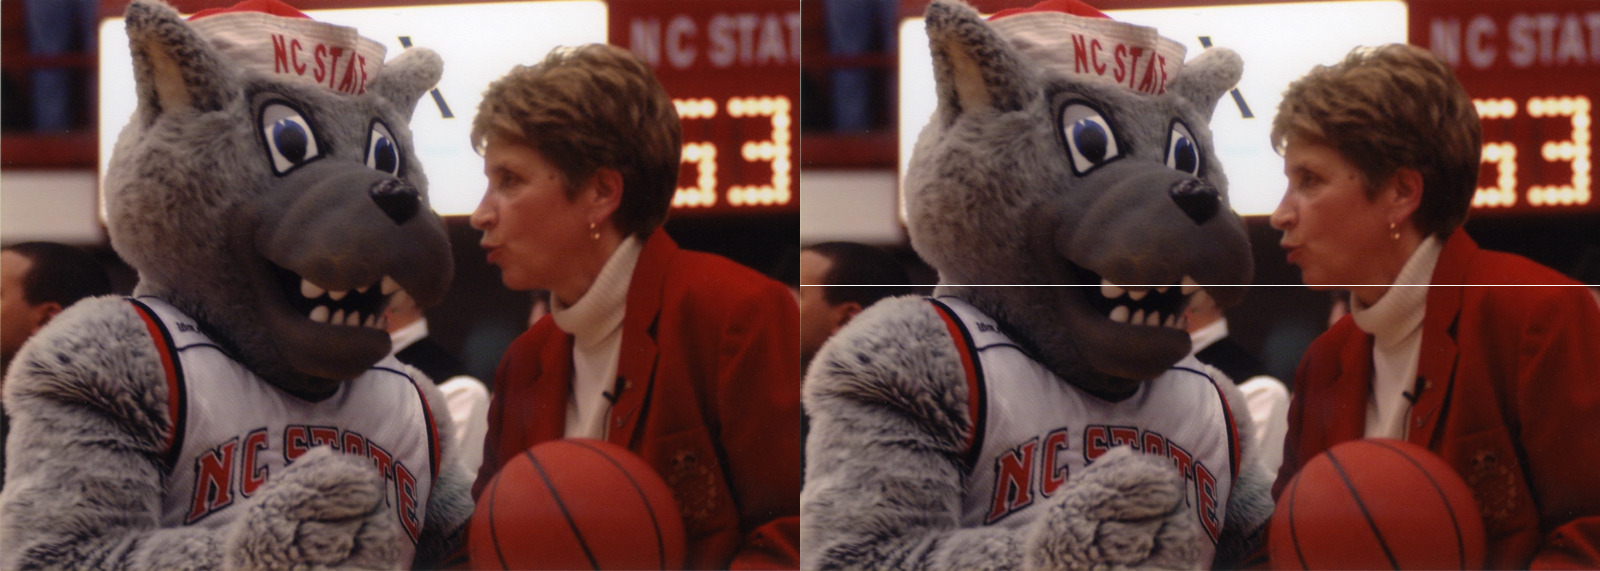

In [5]:
# Membaca kembali gambar kucing
image = io.imread("https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg")

# Membuat dua salinan dalam format RGB
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mendapatkan dimensi
tinggi = image_3.shape[0]
lebar = image_3.shape[1]

# Membuat garis horizontal di tengah gambar
# Loop ini berjalan untuk setiap kolom (lebar) gambar
for y in range(lebar):
  # Mengatur piksel di tengah vertikal menjadi putih [R, G, B]
  image_3[int(tinggi/2), y] = [255, 255, 255]

# Menampilkan gambar asli dan yang telah dimodifikasi secara berdampingan
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

## Tugas: Menggambar Garis dan Kotak
Blok kode ini menunjukkan cara menggambar garis vertikal, dua garis diagonal, garis horizontal dengan panjang terbatas, dan sebuah kotak putih dengan memanipulasi piksel secara langsung, sesuai dengan tugas yang diberikan.

Gambar Asli


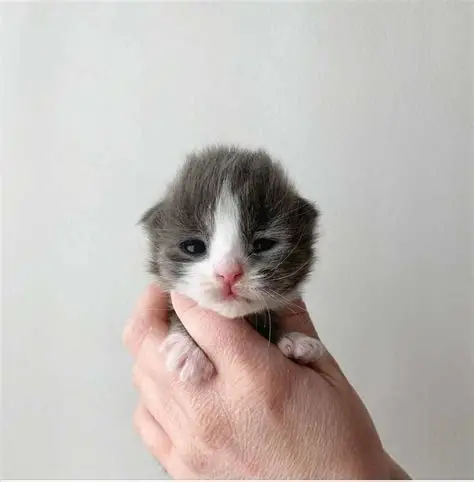


Gambar dengan Garis Vertikal


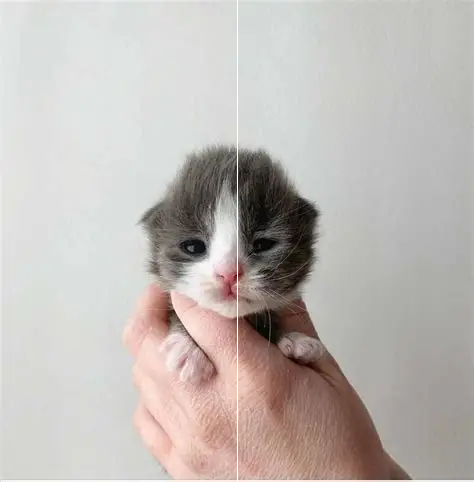


Gambar dengan Garis Diagonal


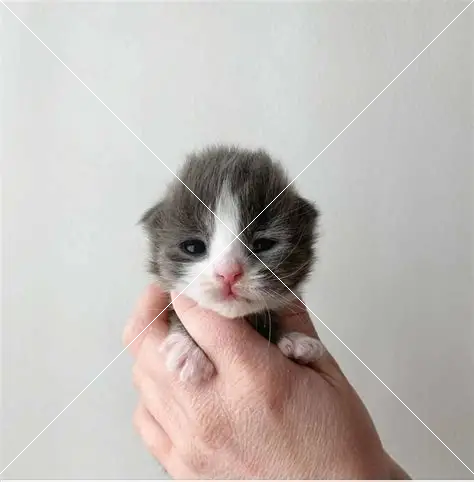


Gambar dengan Garis Horizontal Sebagian


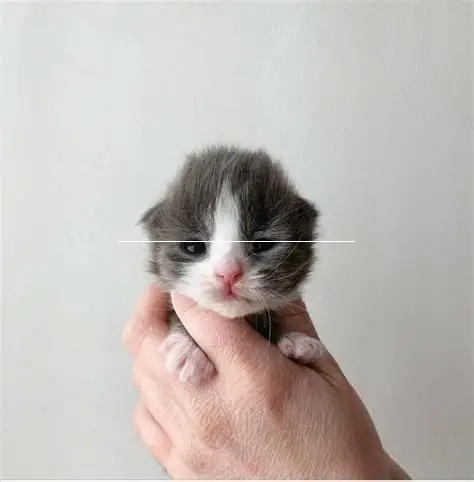


Gambar dengan Kotak Putih


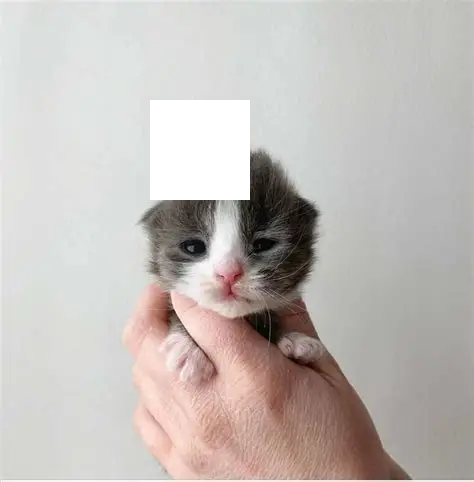

In [9]:
# Membaca gambar kucing
image_task = io.imread("https://tse2.mm.bing.net/th/id/OIP.P7btd69St4lJNYlLuBt6SAHaHi?rs=1&pid=ImgDetMain&o=7&rm=3")
image_task_rgb = cv.cvtColor(image_task, cv.COLOR_BGR2RGB)

# Mendapatkan dimensi
height = image_task_rgb.shape[0]
width = image_task_rgb.shape[1]

# --- Tugas 1: Menggambar Garis Vertikal ---
img_vertical = image_task_rgb.copy()
for x in range(height):
  img_vertical[x, int(width/2)] = [255, 255, 255] # Garis putih

# --- Tugas 1: Menggambar Garis Diagonal ---
img_diagonal = image_task_rgb.copy()
# Dari kiri-atas ke kanan-bawah
for i in range(min(height, width)):
  img_diagonal[i, i] = [255, 255, 255]
# Dari kanan-atas ke kiri-bawah
for i in range(min(height, width)):
    img_diagonal[i, (width-1)-i] = [255, 255, 255] # Garis merah

# --- Tugas 2: Menggambar Garis Horizontal dengan Panjang Tertentu ---
img_partial_line = image_task_rgb.copy()
start_col = int(width / 4)
end_col = int(width * 3 / 4)
for y in range(start_col, end_col):
    img_partial_line[int(height/2), y] = [255, 255, 255]

# --- Tugas 3: Menggambar Kotak Putih ---
img_box = image_task_rgb.copy()
start_row, end_row = 100, 200
start_col, end_col = 150, 250
for r in range(start_row, end_row):
    for c in range(start_col, end_col):
        img_box[r, c] = [255, 255, 255] # Kotak putih


# Menampilkan hasil
print("Gambar Asli")
cv2_imshow(image_task_rgb)
print("\nGambar dengan Garis Vertikal")
cv2_imshow(img_vertical)
print("\nGambar dengan Garis Diagonal")
cv2_imshow(img_diagonal)
print("\nGambar dengan Garis Horizontal Sebagian")
cv2_imshow(img_partial_line)
print("\nGambar dengan Kotak Putih")
cv2_imshow(img_box)